<a href="https://colab.research.google.com/github/lolipie007/Earthquake-Using-Random-Forest-Reg/blob/main/Tsunami_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [266]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [267]:
df=pd.read_csv('/content/tsunami_dataset.csv')

In [268]:
df.columns

Index(['ID', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'LATITUDE', 'LONGITUDE',
       'LOCATION_NAME', 'COUNTRY', 'REGION', 'CAUSE', 'EVENT_VALIDITY',
       'EQ_MAGNITUDE', 'EQ_DEPTH', 'TS_INTENSITY', 'DAMAGE_TOTAL_DESCRIPTION',
       'HOUSES_TOTAL_DESCRIPTION', 'DEATHS_TOTAL_DESCRIPTION', 'URL',
       'COMMENTS'],
      dtype='object')

In [269]:
df.shape

(2259, 21)

In [270]:
df.isnull().sum()

ID                             0
YEAR                           0
MONTH                        104
DAY                          177
HOUR                         951
MINUTE                      1024
LATITUDE                       0
LONGITUDE                      0
LOCATION_NAME                  9
COUNTRY                        0
REGION                         1
CAUSE                          1
EVENT_VALIDITY                 0
EQ_MAGNITUDE                 785
EQ_DEPTH                    1352
TS_INTENSITY                1158
DAMAGE_TOTAL_DESCRIPTION    1204
HOUSES_TOTAL_DESCRIPTION    1653
DEATHS_TOTAL_DESCRIPTION    1585
URL                            0
COMMENTS                     164
dtype: int64

In [271]:
df.drop_duplicates()

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,LATITUDE,LONGITUDE,LOCATION_NAME,COUNTRY,...,CAUSE,EVENT_VALIDITY,EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY,DAMAGE_TOTAL_DESCRIPTION,HOUSES_TOTAL_DESCRIPTION,DEATHS_TOTAL_DESCRIPTION,URL,COMMENTS
0,12,-330,NaN,NaN,NaN,NaN,40.000,25.000,"E. SPORADES ISLANDS, AEGEAN ISLANDS",GREECE,...,Earthquake,Very Doubtful Tsunami,7.0,NaN,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"330 B.C. Aegean Sea, Sporades Islands, 40 N 25..."
1,481,1764,2.0,11.0,NaN,NaN,51.450,-2.583,"BRISTOL, ENGLAND",UK,...,Unknown,Very Doubtful Tsunami,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"Reference #1894, in full: ""On Saturday the 11t..."
2,71,859,NaN,NaN,NaN,NaN,36.080,36.250,SAMANDAGI,TURKEY,...,Earthquake,Questionable Tsunami,NaN,NaN,3.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"859 (possibly 861), November. Levantian Sea, N..."
3,186,1580,1.0,NaN,NaN,NaN,40.000,128.000,YELLOW SEA,NORTH KOREA,...,Unknown,Very Doubtful Tsunami,NaN,NaN,1.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,<P><blockquote><i>Reference #414:</i></blockqu...
4,5,-1300,NaN,NaN,NaN,NaN,39.960,26.240,"IONIAN COASTS, TROAD",TURKEY,...,Unknown,Questionable Tsunami,6.0,NaN,5.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,1300 B.C. Ionian and Aegean Seas. References t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,5753,2020,7.0,22.0,6.0,12.0,55.030,-158.522,"SHUMAGIN ISLANDS, AK",USA,...,Earthquake,Definite Tsunami,7.8,28.0,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,NaN
2255,5750,2020,6.0,18.0,12.0,49.0,-33.294,-177.838,"S OF RAOUL ISLAND, KERMADEC ISLANDS",NEW ZEALAND,...,Earthquake,Definite Tsunami,7.4,10.0,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,A small tsunami (12 cm) occurred today followi...
2256,5752,2013,4.0,22.0,1.0,16.0,18.081,-102.182,MEXICO,MEXICO,...,Earthquake,Probable Tsunami,6.0,30.0,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"In the same subduction zone, earthquakes of Ap..."
2257,5749,1867,6.0,10.0,NaN,NaN,-7.800,110.400,JAVA,INDONESIA,...,Earthquake,Very Doubtful Tsunami,NaN,NaN,NaN,Severe (~>$5 to $24 million),Many (~101 to 1000 houses),Few (~1 to 50 people),https://www.ngdc.noaa.gov/hazel/view/hazards/t...,A seaquake was observed in the backarc. While ...


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        2259 non-null   int64  
 1   YEAR                      2259 non-null   int64  
 2   MONTH                     2155 non-null   float64
 3   DAY                       2082 non-null   float64
 4   HOUR                      1308 non-null   float64
 5   MINUTE                    1235 non-null   float64
 6   LATITUDE                  2259 non-null   float64
 7   LONGITUDE                 2259 non-null   float64
 8   LOCATION_NAME             2250 non-null   object 
 9   COUNTRY                   2259 non-null   object 
 10  REGION                    2258 non-null   object 
 11  CAUSE                     2258 non-null   object 
 12  EVENT_VALIDITY            2259 non-null   object 
 13  EQ_MAGNITUDE              1474 non-null   float64
 14  EQ_DEPTH

##VISUALIZATION

In [304]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import folium
from folium import Circle
from folium.plugins import HeatMap

In [311]:
df['TS_INTENSITY'].fillna(df['TS_INTENSITY'].mean(), inplace=True)

In [315]:
map_ = folium.Map(location=[0, 0], tiles='openstreetmap', zoom_start=2.4)
for i in range(0,len(df)):
    Circle(
        location=[df.iloc[i]['LATITUDE'], df.iloc[i]['LONGITUDE']],
        radius=df.iloc[i]['TS_INTENSITY']*10000,
        color='yellow', fill=True).add_to(map_)
map_

In [314]:
map_ = folium.Map(location=[0.0, 0.0], tiles='cartodbpositron', zoom_start=1.5)
HeatMap(data=df[['LATITUDE', 'LONGITUDE']], radius=10).add_to(map_)
map_

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


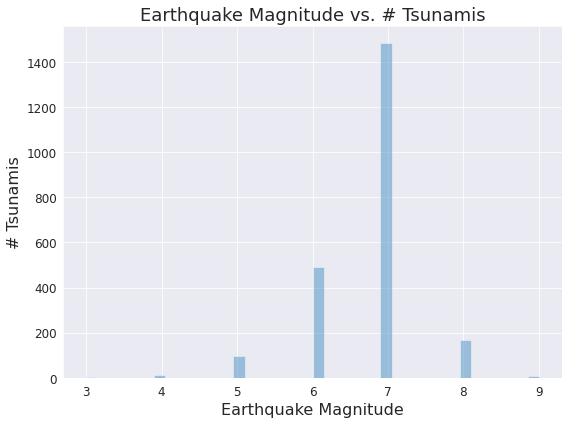

In [316]:
plt.figure(figsize=(8,6))
ax = sns.distplot(df["EQ_MAGNITUDE"], kde=False)
ax.axes.set_title("Earthquake Magnitude vs. # Tsunamis",fontsize=18)
ax.set_xlabel("Earthquake Magnitude",fontsize=16)
ax.set_ylabel("# Tsunamis",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

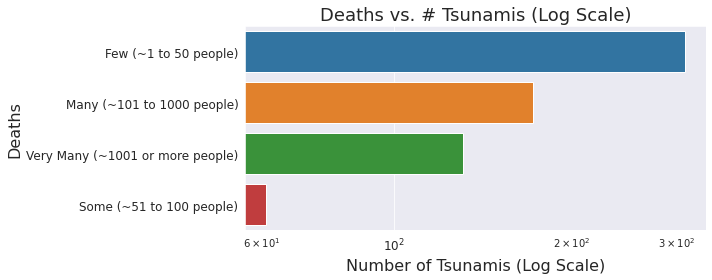

In [317]:
plt.figure(figsize=(10,4))
ax = sns.countplot(y="DEATHS_TOTAL_DESCRIPTION", data=df, order=df["DEATHS_TOTAL_DESCRIPTION"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Deaths vs. # Tsunamis (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Tsunamis (Log Scale)",fontsize=16)
ax.set_ylabel("Deaths",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

##PREPROCESSING

In [273]:
df['MONTH'].fillna(int(df['MONTH'].mean()), inplace=True)

In [274]:
df['DAY'].fillna(int(df['DAY'].mean()), inplace=True)

In [275]:
df['HOUR'].fillna(int(df['HOUR'].mean()), inplace=True)

In [276]:
df['LONGITUDE'] = df['LONGITUDE'].astype(int) 
df['LATITUDE'] = df['LATITUDE'].astype(int)  
df['MONTH'] = df['MONTH'].astype(int)  
df['DAY'] = df['DAY'].astype(int) 
df['HOUR'] = df['HOUR'].astype(int) 
df['MINUTE'].fillna(int(df['MINUTE'].mean()), inplace=True) 
df['EQ_MAGNITUDE'].fillna(int(df['EQ_MAGNITUDE'].mean()), inplace=True)
df['MINUTE'] = df['MINUTE'].astype(int) 
df['EQ_MAGNITUDE'] = df['EQ_MAGNITUDE'].astype(int) 


In [277]:
df.isnull().sum()

ID                             0
YEAR                           0
MONTH                          0
DAY                            0
HOUR                           0
MINUTE                         0
LATITUDE                       0
LONGITUDE                      0
LOCATION_NAME                  9
COUNTRY                        0
REGION                         1
CAUSE                          1
EVENT_VALIDITY                 0
EQ_MAGNITUDE                   0
EQ_DEPTH                    1352
TS_INTENSITY                1158
DAMAGE_TOTAL_DESCRIPTION    1204
HOUSES_TOTAL_DESCRIPTION    1653
DEATHS_TOTAL_DESCRIPTION    1585
URL                            0
COMMENTS                     164
dtype: int64

In [278]:
X=df[['MINUTE','HOUR','DAY','MONTH','YEAR','LATITUDE','LONGITUDE']] 
X

,MINUTE,HOUR,DAY,MONTH,YEAR,LATITUDE,LONGITUDE
0,28,11,15,6,-330,40,25
1,28,11,11,2,1764,51,-2
2,28,11,15,6,859,36,36
3,28,11,15,1,1580,40,128
4,28,11,15,6,-1300,39,26
...,...,...,...,...,...,...,...
2254,12,6,22,7,2020,55,-158
2255,49,12,18,6,2020,-33,-177
2256,16,1,22,4,2013,18,-102
2257,28,11,10,6,1867,-7,110


In [279]:
y=df[['EQ_MAGNITUDE']] 
y

,EQ_MAGNITUDE
0,7
1,7
2,7
3,7
4,6
...,...
2254,7
2255,7
2256,6
2257,7


##SPLITTING THE DATASET

In [280]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [281]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler() 
X_train=scaler.fit_transform(X_train) 
X_test=scaler.transform(X_test) 

In [282]:
X_train

array([[-0.72722078,  0.35447752, -0.0878867 , ...,  0.34594189,
         0.79728273, -0.25159311],
       [ 1.3651478 , -0.60212474, -0.93262746, ..., -0.25534964,
        -1.74861983, -1.0550776 ],
       [ 1.3651478 ,  1.11975932,  0.75685406, ...,  0.28581273,
         0.79728273, -0.23246252],
       ...,
       [-0.00293935, -0.02816339, -1.17398196, ...,  0.27435956,
        -0.6211487 ,  0.92493776],
       [ 0.8018178 , -0.60212474, -0.5705957 , ...,  0.55209898,
        -0.51203859,  0.51363022],
       [-0.00293935, -0.21948384,  1.48091757, ..., -0.73638286,
        -1.96684005, -1.07420819]])

In [283]:
X_test

array([[ 1.68705066,  0.16315706,  0.27414506, ...,  0.57500532,
        -1.78498987, -2.06899852],
       [-2.25625935,  2.26768203, -1.05330471, ...,  0.29440261,
        -1.60313968, -1.0646429 ],
       [ 2.25038066,  2.07636158,  0.75685406, ...,  0.41752421,
        -1.71224979, -1.0550776 ],
       ...,
       [-0.00293935, -0.02816339,  0.03279055, ...,  0.11974174,
        -0.6211487 ,  0.55189139],
       [ 1.9284778 ,  0.54579797,  0.51549956, ...,  0.24286334,
        -0.33018841, -1.13159994],
       [ 2.49180781, -2.13268835,  1.72227207, ...,  0.36312164,
        -1.09395917, -1.10290406]])

In [284]:
y_train

,EQ_MAGNITUDE
1756,5
190,9
527,7
2062,7
775,6
...,...
848,7
335,7
618,6
2004,8


In [285]:
y_test

,EQ_MAGNITUDE
2255,7
969,7
895,6
979,8
2236,6
...,...
2008,7
1378,7
521,8
748,7


In [286]:
X_train.shape

(1807, 7)

In [287]:
X_test.shape

(452, 7)

##MODEL FITTING

In [289]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(3,2),max_iter=500,activation='relu',solver='adam',batch_size='auto') 
mlp.fit(X_train,y_train) 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(3, 2), max_iter=500)

In [290]:
pre=mlp.predict(X_test)

##EVALUATING METRICS

In [291]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pre)

array([[  0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0,   0,  22,   0,   0],
       [  0,   0,   0,   5, 101,   0,   0],
       [  0,   0,   0,   3, 287,   0,   0],
       [  0,   0,   0,   0,  31,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0]])

In [292]:
mlp.score(X_test,y_test)

0.6460176991150443

##Hyperparameter tuning

In [293]:
X=X.head(30)
y=y.head(30)

In [294]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [295]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler() 
X_train=scaler.fit_transform(X_train) 
X_test=scaler.transform(X_test) 

In [296]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(3,2),max_iter=500,activation='relu',solver='adam',batch_size='auto') 
mlp.fit(X_train,y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(3, 2), max_iter=500)

In [297]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [298]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [299]:
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=cv)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterati

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=MLPClassifier(hidden_layer_sizes=(3, 2), max_iter=500),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [300]:
print('Best Score: %s' % clf.best_score_)
print('Best Hyperparameters: %s' % clf.best_params_)

Best Score: 0.9333333333333333
Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'sgd'}
